In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
#ok for this instead of predicting the raw values we will predict the difference of the target from the mean

In [2]:
train = pd.read_csv('Data/train_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH']).dropna()
test = pd.read_csv('Data/test_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH']).dropna()
# train = pd.read_csv('Data/train_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH'])
# test = pd.read_csv('Data/test_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH'])

train, test

(        sample  ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  FLOATMAG_ACC_ADC_PORT_0  \
 2            2                  1.0     0.0     -3.0                    114.0   
 3            3                  2.0     1.0      1.0                    -76.0   
 4            4                  2.0     0.0     -1.0                     49.0   
 5            5                  0.0    -2.0     -2.0                    -10.0   
 6            6                 -1.0    -1.0      1.0                     41.0   
 ...        ...                  ...     ...      ...                      ...   
 210217    3873             100001.0     0.0     -2.0                    243.0   
 210218    3874             100000.0    -1.0     -1.0                     46.0   
 210219    3875             100004.0     4.0      5.0                     85.0   
 210220    3876             100000.0    -4.0     -8.0                    -26.0   
 210221    3877             100001.0     1.0      5.0                    -64.0   
 
         DAC_F

In [3]:
prediction_timestep = 1

train["target"] = train.groupby("file")["FLOATMAG_ACC_ADC_PORT_0"].shift(-prediction_timestep)
test["target"] = test.groupby("file")["FLOATMAG_ACC_ADC_PORT_0"].shift(-prediction_timestep)

In [ ]:
#calculating new targets (difference from mean target)

#so to calculate the mean we first have to 'align' the data

#we should check out the original data and make sure that the comand possitions are in alignment based on sample number

In [22]:
filenames = [i for i in os.listdir('Data/FLOATMAG_BH_Datalog_2023_10_17 09.37.30 _Samp=8000/') if i.endswith(".dat")]

train_data = pd.DataFrame()

num_files_in_train = 24

# Loop through each file
for i in np.random.choice(len(filenames), num_files_in_train, replace = False):
    # Read the data from the file
    data = pd.read_csv(f'Data/FLOATMAG_BH_Datalog_2023_10_17 09.37.30 _Samp=8000/{filenames[i]}', delimiter="\t")
    
    # Check if 'sample' column exists and set it as index
    if 'sample' in data.columns:
        data.set_index('sample', inplace=True)
    
    # Extract the "CMD_POS_FLOATMAG_BH" column and rename it
    column = data["CMD_POS_FLOATMAG_BH"].rename(f'CMD_POS_FLOATMAG_BH_{i}')
    
    # Concatenate the extracted column to the train_data DataFrame
    train_data = pd.concat([train_data, column], axis=1)

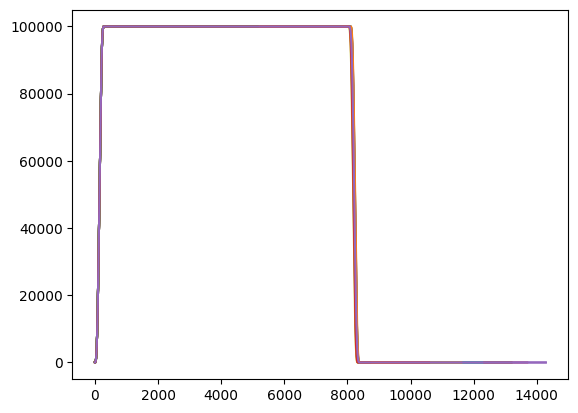

In [49]:
#looks aligned, either way what are we going to do even if it wasnt?

for i in train_data.columns:
    plt.plot(train_data[i])

In [54]:
train.set_index(["file", "sample"], inplace = True)

In [60]:
mean_target_values = train.groupby("sample")["target"].mean()

In [66]:
train["mean_target"] = train.index.get_level_values("sample").map(mean_target_values)

In [68]:
train["target_difference"] = train["target"] - train["mean_target"]

In [109]:
for i in range(13):
    print(train.loc[i]["target_difference"].argmax())

8350
8211
8214
8372
8212
8455
8347
8336
8459
8219
8332
8205
8205


In [110]:
train.xs(8350, level="sample")

,ENC_POS_FLOATMAG_BH,dENC_X,ddENC_X,FLOATMAG_ACC_ADC_PORT_0,DAC_FLOATMAG_BH,target,mean_target,target_difference
file,,,,,,,,
0,458.0,-1.0,3.0,4043.0,-320.0,4343.0,-1091.333333,5434.333333
1,809.0,-50.0,4.0,-7280.0,81.0,-7327.0,-1091.333333,-6235.666667
2,1033.0,-63.0,0.0,-8137.0,108.0,-7943.0,-1091.333333,-6851.666667
3,493.0,-1.0,4.0,-241.0,-329.0,231.0,-1091.333333,1322.333333
4,974.0,-60.0,4.0,-7794.0,102.0,-7555.0,-1091.333333,-6463.666667
5,477.0,-4.0,-6.0,2366.0,-320.0,2512.0,-1091.333333,3603.333333
6,440.0,-7.0,0.0,5020.0,-302.0,5116.0,-1091.333333,6207.333333
7,361.0,-14.0,-2.0,5860.0,-258.0,5797.0,-1091.333333,6888.333333
8,492.0,-1.0,3.0,546.0,-331.0,866.0,-1091.333333,1957.333333


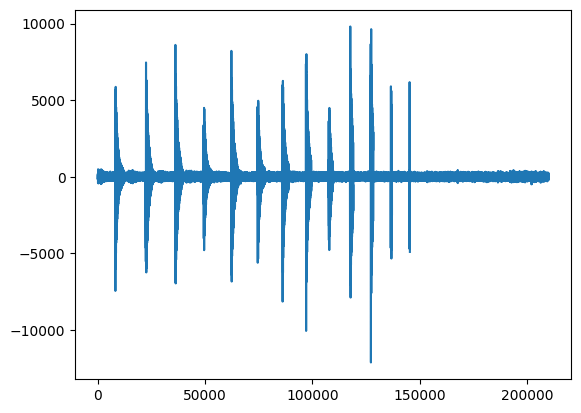

In [73]:
plt.plot(train["target_difference"].values)

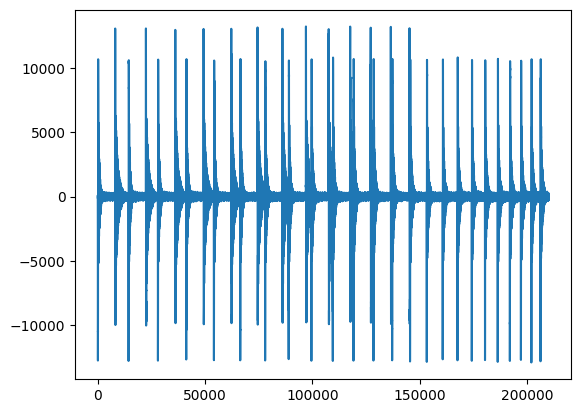

In [82]:
plt.plot(train["target"].values)

In [ ]:
train["target_difference"]

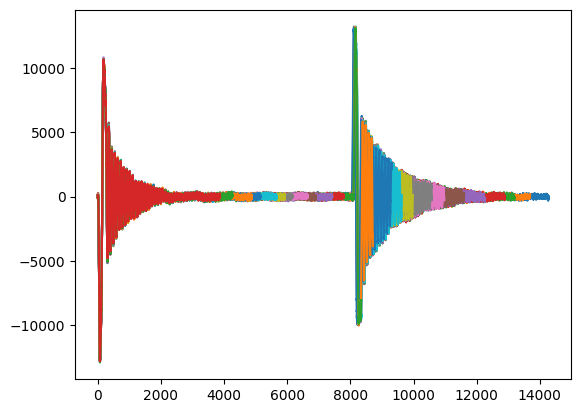

In [79]:

for series in train.groupby("file")["target"]:
    plt.plot(series[1].values)

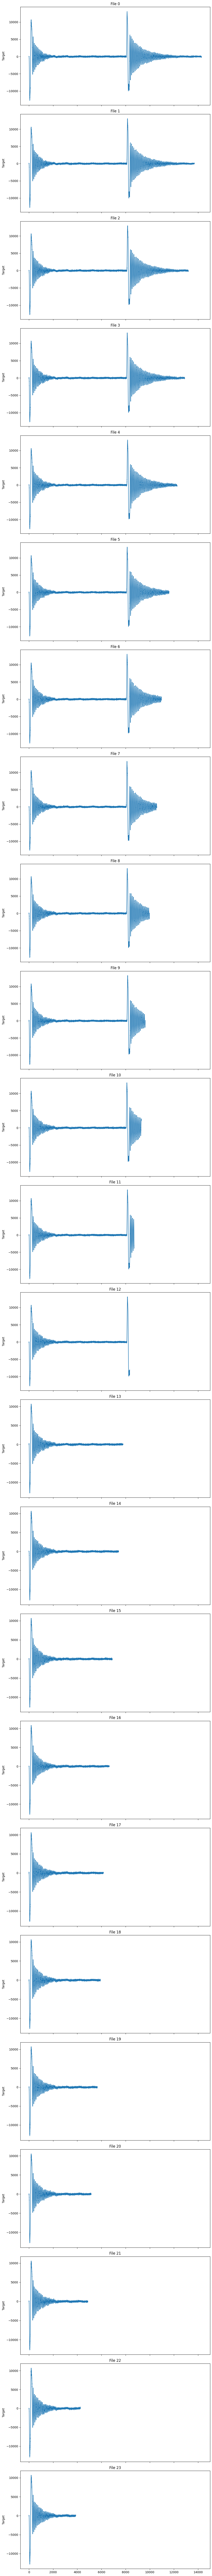

In [81]:
# Get the number of unique 'file' values to determine the number of subplots needed
num_files = train.index.get_level_values("file").nunique()

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_files, 1, figsize=(10, 5*num_files), sharex=True) # Adjust the figure size as needed

# Iterate over each group from groupby
for (file, data), ax in zip(train.groupby("file")["target"], axes):
    # Plot the 'target' series in its own subplot
    ax.plot(data.values)
    ax.set_title(f'File {file}')
    ax.set_ylabel('Target')

# Show the plot with subplots stacked vertically
plt.tight_layout()
plt.show()

In [80]:
train

ENC_POS_FLOATMAG_BH  dENC_X  ddENC_X  FLOATMAG_ACC_ADC_PORT_0  \
file sample                                                                  
0    2                       1.0     0.0     -3.0                    114.0   
     3                       2.0     1.0      1.0                    -76.0   
     4                       2.0     0.0     -1.0                     49.0   
     5                       0.0    -2.0     -2.0                    -10.0   
     6                      -1.0    -1.0      1.0                     41.0   
...                          ...     ...      ...                      ...   
23   3873               100001.0     0.0     -2.0                    243.0   
     3874               100000.0    -1.0     -1.0                     46.0   
     3875               100004.0     4.0      5.0                     85.0   
     3876               100000.0    -4.0     -8.0                    -26.0   
     3877               100001.0     1.0      5.0                    -64.0   

             DAC_FLOATMAG_BH  target  mean_target  target_difference  
file sample                                                           
0    2                -200.0   -76.0     4.750000         -80.750000  
     3                -191.0    49.0    11.875000          37.125000  
     4                -171.0   -10.0     4.708333         -14.708333  
     5                -142.0    41.0    18.500000          22.500000  
     6                -127.0   -11.0    -6.375000          -4.625000  
...                      ...     ...          ...                ...  
23   3873              254.0    46.0    45.291667           0.708333  
     3874              259.0    85.0    31.375000          53.625000  
     3875              240.0   -26.0    21.833333         -47.833333  
     3876              270.0   -64.0     2.083333         -66.083333  
     3877              254.0     NaN    33.695652                NaN  

[210174 rows x 8 columns]

In [78]:
series[1]

file  sample
0     2         -76.0
      3          49.0
      4         -10.0
      5          41.0
      6         -11.0
                ...  
      14279     -27.0
      14280    -212.0
      14281    -100.0
      14282     -92.0
      14283       NaN
Name: target, Length: 14282, dtype: float64

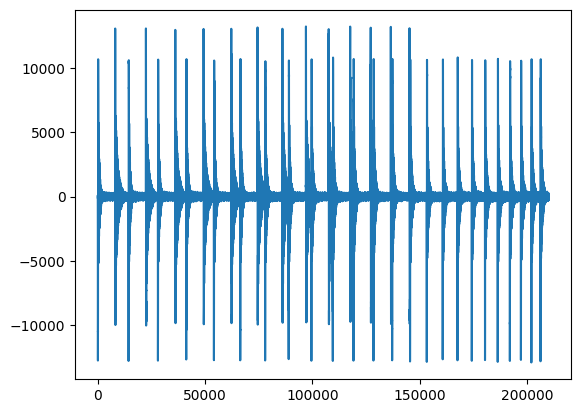

In [74]:
plt.plot(train["target"].values)